# Homework - Week 13

## Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)

In [3]:
data = data[data.index.get_level_values("Year") > 
            datetime.datetime(2000,1,1)]
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2005-01-01  2.889240            4.291101   
         2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2005-01-01                        3.487611     0.000000   
         2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2005-01-01                          2.368615    4.298872   
         2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
ALB      2017-01-01              NaN              10342.0  
         2016-01-01          10342.0              10032.0  
         2015-01-01          10032.0               9808.0  
         2014-01-01           9808.0               9660.0  
         2013-01-01           9660.0               9592.0  
...                              ...                  ...  
ZWE      2005-01-01           1510.0               1622.0  
         2004-01-01           1622.0               1722.0  
         2003-01-01           1722.0               2054.0  
         2002-01-01           2054.0               2228.0  
         2001-01-01           2228.0               2249.0  

[2466 rows x 8 columns]

In [4]:
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

In [5]:
diff_index = data.groupby(level=0).diff(-1).dropna().index  

In [6]:
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

## OLS Regression

In [7]:
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    data[indicator_name] = 0  
    
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 

In [8]:
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
keys = data.keys()
for key in keys:  
    if "GDP" in key:  
        data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
        data["Log " + key] = np.log(data[key])  
        data["Log " + key + " Lag"] = data["Log " + key].groupby("ISO_Code").shift()

In [9]:
diff_index = data.groupby(level=0).diff().dropna().index  
data_dict = {}  
data_dict["Data"] = data  

data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby("ISO_Code").diff() 
data_dict["Diff Data"].dropna(inplace = True)  

In [10]:
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  

In [11]:
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)

In [12]:
data_dict[key].dropna()

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


In [13]:
import statsmodels.api as sm

In [14]:
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  

for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 8.073e+05
Date:                 Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                         23:10:00   Log-Likelihood:                 3475.9
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2028   BIC:                            -6929.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-14-25a8e367476c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-14-25a8e367476c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [15]:
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]

for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 5.385e+05
Date:                 Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                         23:10:00   Log-Likelihood:                 3477.0
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2027   BIC:                            -6923.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-15-114716c301d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-15-114716c301d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


## Panel Regression

In [16]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
from linearmodels import PanelOLS

In [18]:
y_name = ["Log RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]

In [19]:
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0708
Estimator:                    PanelOLS   R-squared (Between):              0.1185
No. Observations:                 2031   R-squared (Within):               0.1328
Date:                 Sun, Nov 14 2021   R-squared (Overall):              0.1279
Time:                         23:10:02   Log-likelihood                    1908.3
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      28.386
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):

<ipython-input-19-cb28ba4ebe72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-19-cb28ba4ebe72>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-19-cb28ba4ebe72>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6156
Estimator:                    PanelOLS   R-squared (Between):              0.6172
No. Observations:                 2031   R-squared (Within):              -1.5357
Date:                 Sun, Nov 14 2021   R-squared (Overall):              0.6145
Time:                         23:10:02   Log-likelihood                   -2335.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      643.99
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2011)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):             81.798
                

<ipython-input-19-cb28ba4ebe72>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-19-cb28ba4ebe72>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])
<ipython-input-19-cb28ba4ebe72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0232
Estimator:                    PanelOLS   R-squared (Between):              0.0127
No. Observations:                 1882   R-squared (Within):               0.0232
Date:                 Sun, Nov 14 2021   R-squared (Overall):              0.0255
Time:                         23:10:02   Log-likelihood                    3531.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.2208
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1728)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic (robust):             4.5663
                

<ipython-input-19-cb28ba4ebe72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-19-cb28ba4ebe72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


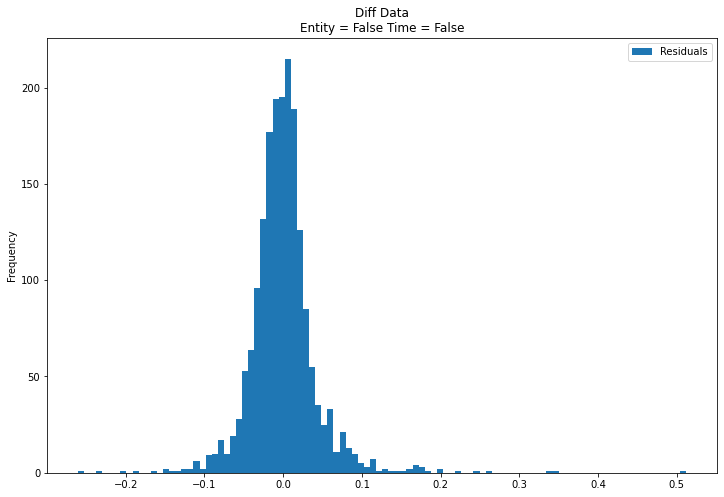

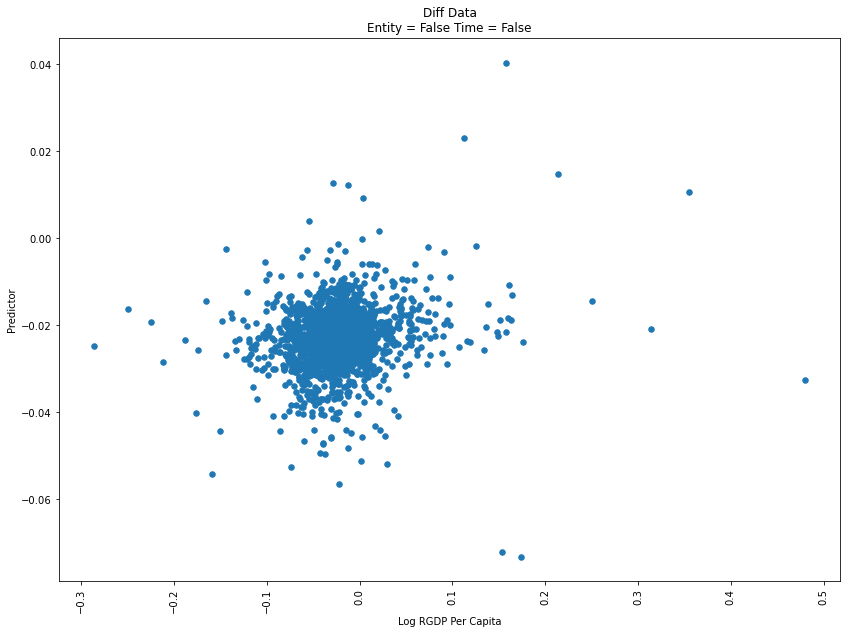

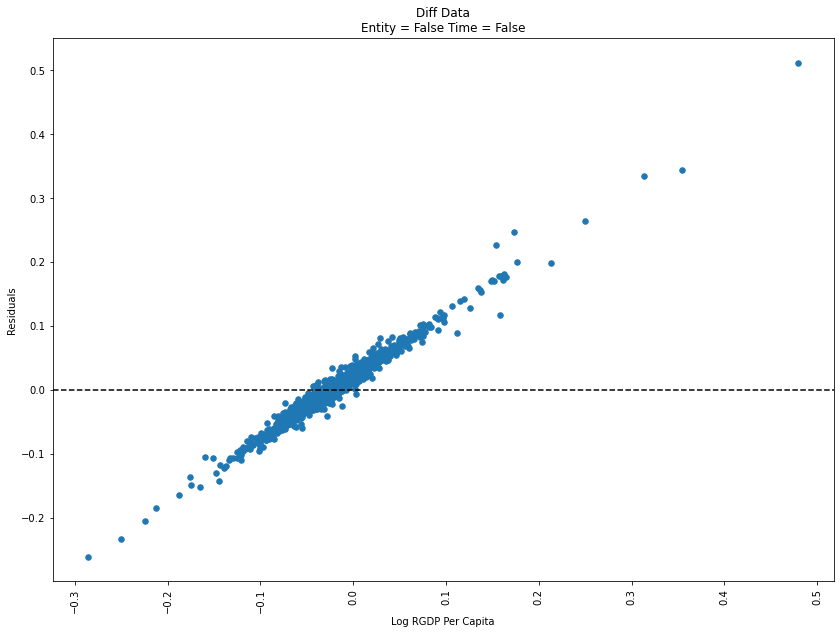

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_name[0],
                      y = "Predictor", 
                      s = 30, 
                      ax = ax)
plt.xticks(rotation=90)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_name[0],
                      y = "Residuals", 
                      s = 30, 
                      ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
plt.show()
plt.close()

## Exercise
The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included.

### Correlation

In [21]:
residuals = {}
for y_var in data.keys():
    X_vars = list(data.keys())
    X_vars.remove(y_var)
    X = data [X_vars]
    X["Constant"] = 1
    y = data[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                    EFW   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.451e+25
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:10:03   Log-Likelihood:                 51803.
No. Observations:                1882   AIC:                        -1.036e+05
Df Residuals:                    1871   BIC:                        -1.035e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of 

In [22]:
residuals.corr()

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag,Log RGDP Per Capita,Log RGDP Per Capita Lag,North America
EFW,1.000000,-0.013718,0.721076,-3.632663e-01,-0.765822,-0.886568,0.664137,-0.713321,0.000004,-0.000012,-1.007474e-04
Size of Government,-0.013718,1.000000,-0.084371,6.609906e-01,0.191546,0.423986,0.348475,0.288870,0.000010,-0.000136,-1.001730e-03
Legal System & Property Rights,0.721076,-0.084371,1.000000,-2.885549e-01,-0.503025,-0.639087,0.396517,-0.585780,0.000065,-0.000006,-1.029040e-03
Sound Money,-0.363266,0.660991,-0.288555,1.000000e+00,0.762956,0.672615,0.156882,0.557078,-0.000098,0.000133,-9.033131e-07
Freedom to trade internationally,-0.765822,0.191546,-0.503025,7.629560e-01,1.000000,0.817470,-0.306019,0.695398,-0.000169,0.000149,1.397701e-04
Regulation,-0.886568,0.423986,-0.639087,6.726155e-01,0.817470,1.000000,-0.423502,0.765512,0.000099,-0.000027,2.318043e-04
RGDP Per Capita,0.664137,0.348475,0.396517,1.568816e-01,-0.306019,-0.423502,1.000000,-0.532696,-0.596494,0.313252,1.808745e-02
RGDP Per Capita Lag,-0.713321,0.288870,-0.585780,5.570782e-01,0.695398,0.765512,-0.532696,1.000000,0.307659,-0.611479,1.192865e-02
Log RGDP Per Capita,0.000004,0.000010,0.000065,-9.813503e-05,-0.000169,0.000099,-0.596494,0.307659,1.000000,-0.450988,-2.320277e-02
Log RGDP Per Capita Lag,-0.000012,-0.000136,-0.000006,1.325540e-04,0.000149,-0.000027,0.313252,-0.611479,-0.450988,1.000000,-1.233867e-02


In [23]:
from datlib.plots import *

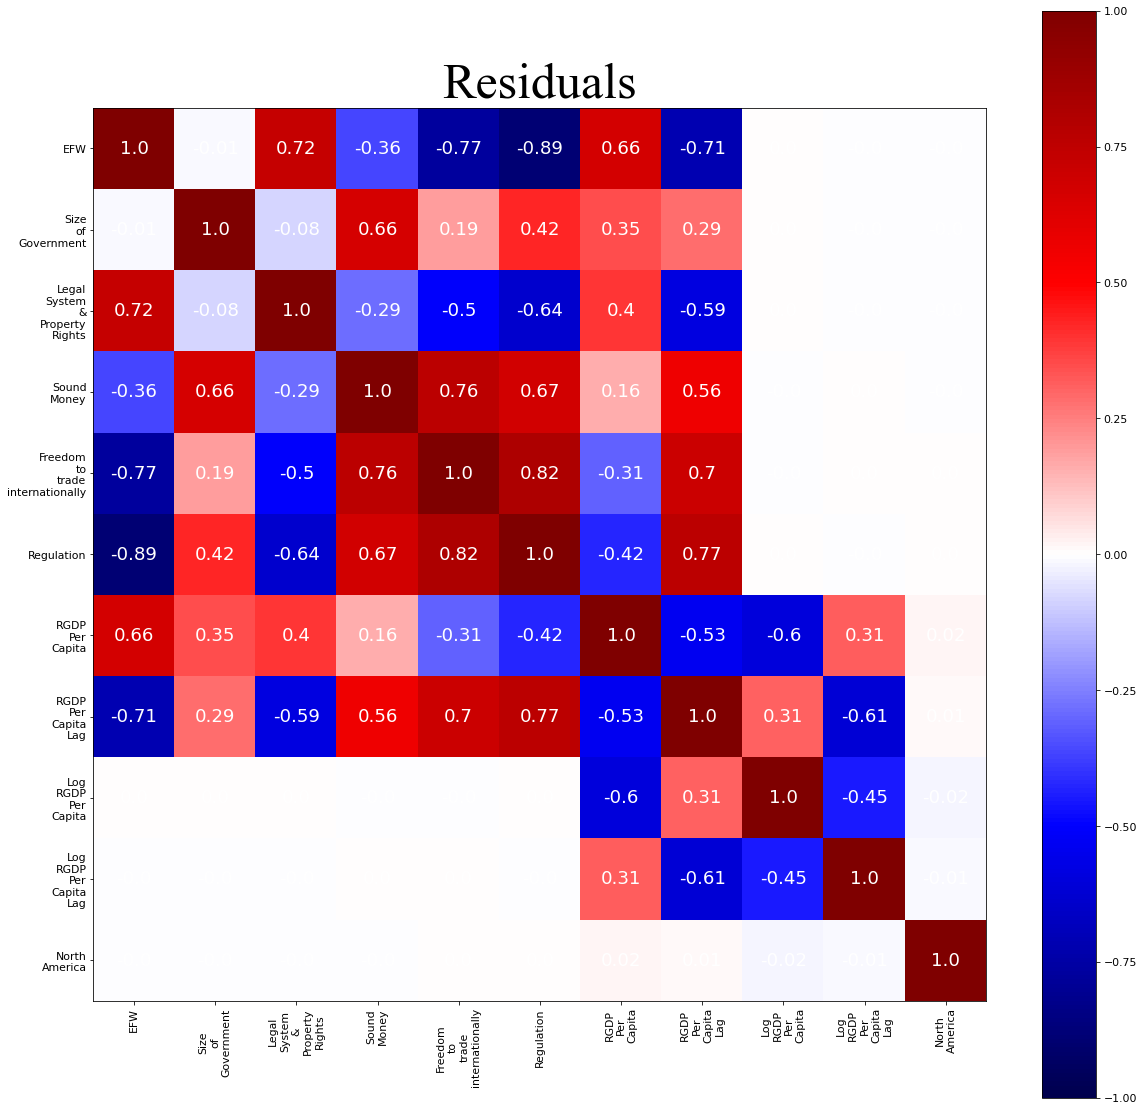

In [24]:
corr_matrix_heatmap(residuals.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Residuals")

In [25]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


### New Data

In [26]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


In [27]:
inflation = pd.read_csv("Inflation.csv")
inflation

,DATE,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
...,...,...
56,2016-01-01,1.261583
57,2017-01-01,2.130110
58,2018-01-01,2.442583
59,2019-01-01,1.812210


In [28]:
new_data = pd.read_csv("fraserWithInflation.csv",
                       index_col = ["ISO_Code", "Year"],   
                       parse_dates = True)
new_data #add inflation in csv

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  Inflation  
ISO_Code Year                                    
ALB      2017-01-01              NaN   2.130110  
         2016-01-01          10342.0   1.261583  
         2015-01-01          10032.0   0.118627  
         2014-01-01           9808.0   1.622223  
         2013-01-01           9660.0   1.464833  
...                              ...        ...  
ZWE      2000-01-01           2249.0   3.376857  
         1995-01-01           2156.0   2.805420  
         1990-01-01           2232.0   5.397956  
         1985-01-01           2198.0   3.545644  
         1980-01-01           2133.0  13.549202  

[3030 rows x 8 columns]

### Rerun Panel

In [29]:
new_data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)

In [30]:
new_data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  Inflation  RGDP Per Capita Lag  
ISO_Code Year                                                         
ALB      2017-01-01              NaN   2.130110                  NaN  
         2016-01-01          10342.0   1.261583                  NaN  
         2015-01-01          10032.0   0.118627                  NaN  
         2014-01-01           9808.0   1.622223               -148.0  
         2013-01-01           9660.0   1.464833                -68.0  
...                              ...        ...                  ...  
ZWE      2000-01-01           2249.0   3.376857                  NaN  
         1995-01-01           2156.0   2.805420                  NaN  
         1990-01-01           2232.0   5.397956                  NaN  
         1985-01-01           2198.0   3.545644                  NaN  
         1980-01-01           2133.0  13.549202                  NaN  

[3030 rows x 9 columns]

In [31]:
for key in new_data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
diff_index = new_data.groupby(level=0).diff(-1).dropna().index  
new_data_dict = {}  
new_data_dict["New Data"] = new_data  
new_data_dict["Diff Data"] = new_data.copy().loc[diff_index]  
new_data_dict["Diff Data"] = new_data.groupby(level=0).diff(-1)  
new_data_dict["Diff Data"]["North America"] = 1
new_data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

In [33]:
new_data_dict["New Data"]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  Inflation  RGDP Per Capita Lag  
ISO_Code Year                                                         
ALB      2017-01-01              NaN   2.130110                  NaN  
         2016-01-01          10342.0   1.261583                  NaN  
         2015-01-01          10032.0   0.118627                  NaN  
         2014-01-01           9808.0   1.622223               -148.0  
         2013-01-01           9660.0   1.464833                -68.0  
...                              ...        ...                  ...  
ZWE      2000-01-01           2249.0   3.376857                  NaN  
         1995-01-01           2156.0   2.805420                  NaN  
         1990-01-01           2232.0   5.397956                  NaN  
         1985-01-01           2198.0   3.545644                  NaN  
         1980-01-01           2133.0  13.549202                  NaN  

[3030 rows x 9 columns]

In [34]:
new_data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  Inflation  RGDP Per Capita Lag  
ISO_Code Year                                                         
ALB      2017-01-01              NaN   2.130110                  NaN  
         2016-01-01          10342.0   1.261583                  NaN  
         2015-01-01          10032.0   0.118627                  NaN  
         2014-01-01           9808.0   1.622223               -148.0  
         2013-01-01           9660.0   1.464833                -68.0  
...                              ...        ...                  ...  
ZWE      2000-01-01           2249.0   3.376857                  NaN  
         1995-01-01           2156.0   2.805420                  NaN  
         1990-01-01           2232.0   5.397956                  NaN  
         1985-01-01           2198.0   3.545644                  NaN  
         1980-01-01           2133.0  13.549202                  NaN  

[3030 rows x 9 columns]

In [35]:
new_data_dict

{'New Data':                           EFW  Size of Government  \
 ISO_Code Year                                       
 ALB      2017-01-01  7.673511            7.528167   
          2016-01-01  7.637742            7.875862   
          2015-01-01  7.639666            7.904257   
          2014-01-01  7.586769            7.882037   
          2013-01-01  7.389525            7.807904   
 ...                       ...                 ...   
 ZWE      2000-01-01  4.299839            5.365058   
          1995-01-01  5.518614            6.418859   
          1990-01-01  4.516140            5.108843   
          1985-01-01  4.226841            5.026250   
          1980-01-01  4.054740            6.322625   
 
                      Legal System & Property Rights  Sound Money  \
 ISO_Code Year                                                      
 ALB      2017-01-01                        5.064907     9.648271   
          2016-01-01                        5.071814     9.553657   
        

In [45]:
y_name = ["RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "Inflation"]

In [48]:
for key, data in new_data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = new_data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

New Data
Entity = True
Time = True


<ipython-input-48-be5341bcab01>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          Size of Government, Legal System & Property Rights, Sound Money, Freedom to trade internationally, Regulation, Inflation, Constant

Set drop_absorbed=True to automatically drop absorbed variables.


KeyError: "None of [Index(['Residuals'], dtype='object')] are in the [columns]"

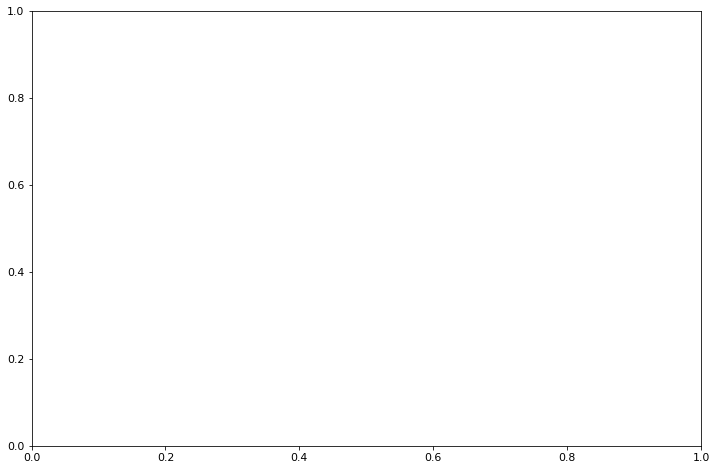

In [49]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_name[0],
                      y = "Predictor", 
                      s = 30, 
                      ax = ax)
plt.xticks(rotation=90)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_name[0],
                      y = "Residuals", 
                      s = 30, 
                      ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
plt.show()
plt.close()